In [1]:
import pandas as pd
import numpy as np
import gc
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = sns.load_dataset('titanic')

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [4]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [6]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [7]:
df_label = df[[ 'sex',  'sibsp', 'parch', 
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone']]

df_label = df_label.astype({'class':str, 'deck':str}).fillna('欠損値')

df_num = df.select_dtypes(include=[float, int])
df_num.head(1)

df_ob = df.select_dtypes(exclude=[float, int])
df_ob.head(1)

display(df_num.shape, df_ob.shape)

In [8]:
df_label.head(1)

,sex,sibsp,parch,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,male,1,0,S,Third,man,True,nan,Southampton,no,False


In [9]:
for col in df_label.columns.tolist():
    print(col,df_label[col].unique())

sex ['male' 'female']
sibsp [1 0 3 4 2 5 8]
parch [0 1 2 5 3 4 6]
embarked ['S' 'C' 'Q' '欠損値']
class ['Third' 'First' 'Second']
who ['man' 'woman' 'child']
adult_male [ True False]
deck ['nan' 'C' 'E' 'G' 'D' 'A' 'B' 'F']
embark_town ['Southampton' 'Cherbourg' 'Queenstown' '欠損値']
alive ['no' 'yes']
alone [False  True]


In [10]:
main_col_label_dic = {}
for col in df_label.columns.tolist():
    cnt = 0
    col_label_dic = {}
    for val in np.unique(df_label[col]):
        col_label_dic.setdefault(val, cnt)
        cnt += 1
        main_col_label_dic[col] = col_label_dic

        
main_col_label_dic

{'sex': {'female': 0, 'male': 1},
 'sibsp': {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 8: 6},
 'parch': {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6},
 'embarked': {'C': 0, 'Q': 1, 'S': 2, '欠損値': 3},
 'class': {'First': 0, 'Second': 1, 'Third': 2},
 'who': {'child': 0, 'man': 1, 'woman': 2},
 'adult_male': {False: 0, True: 1},
 'deck': {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'nan': 7},
 'embark_town': {'Cherbourg': 0, 'Queenstown': 1, 'Southampton': 2, '欠損値': 3},
 'alive': {'no': 0, 'yes': 1},
 'alone': {False: 0, True: 1}}

### ラベルエンコーディング

In [11]:
df_label_enc = df_label.copy()

# 列毎にラベルエンコーディングを実施
# map()の引数に辞書dict（{key: value}）を指定すると、keyと一致する要素がvalueに置き換えられる。
for col in df_label_enc.columns.tolist():
    df_label_enc[col] = df_label_enc[col].map(main_col_label_dic[col])

In [12]:
df_label_enc.head()

,sex,sibsp,parch,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,1,1,0,2,2,1,1,7,2,0,0
1,0,1,0,0,0,2,0,2,0,1,0
2,0,0,0,2,2,2,0,7,2,1,1
3,0,1,0,2,0,2,0,2,2,1,0
4,1,0,0,2,2,1,1,7,2,0,1


In [13]:
df_label_enc.shape 

(891, 11)

In [14]:
# 数値型の列と結合してまとめる
df_merge = pd.merge(df, df_label_enc, left_index=True, right_index=True, suffixes=['','_label'])
display(df_merge.shape, df_merge.head())

(891, 26)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,sex_label,sibsp_label,parch_label,embarked_label,class_label,who_label,adult_male_label,deck_label,embark_town_label,alive_label,alone_label
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1,1,0,2,2,1,1,7,2,0,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,0,1,0,0,0,2,0,2,0,1,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0,0,0,2,2,2,0,7,2,1,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,0,1,0,2,0,2,0,2,2,1,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,1,0,0,2,2,1,1,7,2,0,1


In [15]:
gc.collect()

25

In [16]:
# クラスタリング用にラベルエンコーディング前の列と欠損値を除外
df_cluster = df_merge[['survived',  'age', 'fare','sex_label', 'sibsp_label', 'parch_label',
       'embarked_label', 'class_label', 'who_label', 'adult_male_label',
       'deck_label', 'embark_town_label', 'alive_label', 'alone_label']]

# 欠損値があるとクラスタリング実施時にerror: The condensed distance matrix must contain only finite values.」というエラーが発生Errrr
df_cluster = df_cluster.dropna()
display(df_cluster.shape, df_cluster.head(1))

(714, 14)

,survived,age,fare,sex_label,sibsp_label,parch_label,embarked_label,class_label,who_label,adult_male_label,deck_label,embark_town_label,alive_label,alone_label
0,0,22.0,7.25,1,1,0,2,2,1,1,7,2,0,0


### 標準化
いったん数値型の列のみ標準化する

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
ss = StandardScaler()

In [19]:
result = ss.fit_transform(df_cluster[['age','fare']])

In [20]:
result[0:3]

array([[-0.53037664, -0.51897787],
       [ 0.57183099,  0.69189675],
       [-0.25482473, -0.50621356]])

In [21]:
df_cluster['age'] = [val[0] for val in result]
df_cluster['fare'] = [val[1] for val in result]
df_cluster.head(1)

,survived,age,fare,sex_label,sibsp_label,parch_label,embarked_label,class_label,who_label,adult_male_label,deck_label,embark_town_label,alive_label,alone_label
0,0,-0.530377,-0.518978,1,1,0,2,2,1,1,7,2,0,0


In [22]:
gc.collect()

0

### クラスタリング
DBSCANでクラスタリング結果のラベルを付与

ラベル毎にまとめ代表値を算出したデータフレームの作成

ラベル毎にまとめ代表値を算出したデータフレームをデンドログラムで可視化

In [23]:
from sklearn.cluster import DBSCAN

In [24]:
dbscan = DBSCAN(eps=0.5, min_samples=10).fit(df_cluster)

In [25]:
display(dbscan.components_)

array([[ 1.        , -0.25482473, -0.50621356, ...,  2.        ,
         1.        ,  1.        ],
       [ 0.        ,  0.36516706, -0.5038498 , ...,  2.        ,
         0.        ,  1.        ],
       [ 0.        , -0.6681526 , -0.5038498 , ...,  2.        ,
         0.        ,  1.        ],
       ...,
       [ 0.        , -0.11704878, -0.45752012, ...,  2.        ,
         0.        ,  1.        ],
       [ 0.        , -0.32371271, -0.52275988, ...,  2.        ,
         0.        ,  1.        ],
       [ 0.        , -0.18593675, -0.41024492, ...,  2.        ,
         0.        ,  1.        ]])

In [26]:
display(len(dbscan.labels_), dbscan.labels_)

714

array([-1, -1,  0, -1,  1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,
        2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,
       -1, -1, -1,  1, -1, -1, -1, -1,  3, -1, -1,  3, -1, -1, -1, -1,  1,
       -1, -1,  2, -1, -1, -1, -1, -1, -1,  0,  1,  4, -1, -1, -1, -1, -1,
        1,  1,  1, -1, -1, -1, -1, -1, -1, -1,  5, -1,  1, -1,  1,  0,  1,
       -1, -1,  1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  4,  1,
        3,  1, -1, -1,  2, -1, -1, -1,  1, -1,  0, -1, -1,  2, -1,  4, -1,
       -1,  2,  2, -1,  1, -1, -1, -1,  1, -1,  6,  1,  1, -1, -1, -1, -1,
       -1, -1, -1,  1, -1, -1, -1,  2,  1, -1, -1, -1, -1, -1,  1,  6,  2,
       -1, -1, -1, -1, -1, -1,  1,  1, -1,  4, -1, -1, -1, -1, -1,  1,  6,
        1,  2, -1,  0, -1, -1,  2, -1,  2,  1, -1,  1, -1,  1,  2, -1,  1,
        2, -1,  2, -1, -1,  2,  2,  2,  1,  3, -1,  5, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  2, -1, -1, -1, -1,  4, -1, -1,
       -1, -1, -1, -1, -1

### 付与されたラベル毎に情報を集約する

In [27]:
df_cluster_labels = df_cluster.copy()
df_cluster_labels['labels'] = dbscan.labels_
df_cluster_labels.head(1)

,survived,age,fare,sex_label,sibsp_label,parch_label,embarked_label,class_label,who_label,adult_male_label,deck_label,embark_town_label,alive_label,alone_label,labels
0,0,-0.530377,-0.518978,1,1,0,2,2,1,1,7,2,0,0,-1


In [28]:
df_cluster_labels_num = df_cluster_labels.set_index('labels').select_dtypes(include=[float])
df_cluster_labels_num.head(1)

,age,fare
labels,,
-1,-0.530377,-0.518978


In [29]:
df_cluster_labels_ob = df_cluster_labels.set_index('labels').select_dtypes(exclude=[float])
df_cluster_labels_ob.head(1)

,survived,sex_label,sibsp_label,parch_label,embarked_label,class_label,who_label,adult_male_label,deck_label,embark_town_label,alive_label,alone_label
labels,,,,,,,,,,,,
-1,0,1,1,0,2,2,1,1,7,2,0,0


In [30]:
df_cluster_labels_ob.head(20)

,survived,sex_label,sibsp_label,parch_label,embarked_label,class_label,who_label,adult_male_label,deck_label,embark_town_label,alive_label,alone_label
labels,,,,,,,,,,,,
-1,0,1,1,0,2,2,1,1,7,2,0,0
-1,1,0,1,0,0,0,2,0,2,0,1,0
0,1,0,0,0,2,2,2,0,7,2,1,1
-1,1,0,1,0,2,0,2,0,2,2,1,0
1,0,1,0,0,2,2,1,1,7,2,0,1
-1,0,1,0,0,2,0,1,1,4,2,0,1
-1,0,1,3,1,2,2,0,0,7,2,0,0
-1,1,0,0,2,2,2,2,0,7,2,1,0
-1,1,0,1,0,0,1,0,0,7,0,1,0


In [31]:
df_cluster_labels_num_g =\
df_cluster_labels_num.reset_index().groupby('labels').agg({'age':['mean','std'],'fare':['mean','std']})
#df_cluster_labels_num.reset_index().groupby('labels').agg({'age':['median','mean','std'],'fare':['median','mean','std']})

col_name_list = []
for col in df_cluster_labels_num.columns.tolist():
    #for idxval in ['median','mean','std']:
    for idxval in ['mean','std']:
        name = col+'_'+idxval
        col_name_list.append(name)

df_cluster_labels_num_g.columns = col_name_list
df_cluster_labels_num_g

,age_mean,age_std,fare_mean,fare_std
labels,,,,
-1,0.031027,1.138136,0.236847,1.154022
0,-0.404082,0.290540,-0.498216,0.027768
1,-0.114700,0.647685,-0.500445,0.049220
2,0.192272,0.777839,-0.392336,0.086832
3,-0.017161,0.319606,-0.515653,0.011246
4,-0.233628,0.324803,-0.514723,0.044771
5,-0.371934,0.292357,-0.493914,0.017982
6,0.234280,0.322214,-0.390578,0.049178


いったん数値型のみで階層型クラスタリングを実施

In [32]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [33]:
# クラスタリング（ウォード法、ユークリッド距離）
Z = linkage(df_cluster_labels_num_g, method = "ward", metric = "euclidean")

{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [45.0, 45.0, 55.0, 55.0],
  [65.0, 65.0, 75.0, 75.0],
  [50.0, 50.0, 70.0, 70.0],
  [22.5, 22.5, 60.0, 60.0],
  [5.0, 5.0, 41.25, 41.25]],
 'dcoord': [[0.0, 0.03392716722560058, 0.03392716722560058, 0.0],
  [0.0, 0.18537599474053515, 0.18537599474053515, 0.03392716722560058],
  [0.0, 0.2833934187198651, 0.2833934187198651, 0.0],
  [0.0, 0.35252552776973806, 0.35252552776973806, 0.0],
  [0.2833934187198651,
   0.5654933931235153,
   0.5654933931235153,
   0.35252552776973806],
  [0.18537599474053515,
   0.8631721212627171,
   0.8631721212627171,
   0.5654933931235153],
  [0.0, 1.9922117132715051, 1.9922117132715051, 0.8631721212627171]],
 'ivl': [-1, 4, 0, 5, 3, 6, 1, 2],
 'leaves': [0, 5, 1, 6, 4, 7, 2, 3],
 'color_list': ['g', 'g', 'g', 'g', 'g', 'g', 'b']}

C:\Anaconda\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Anaconda\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


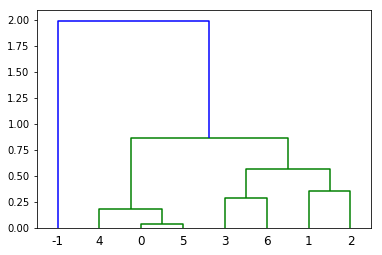

In [34]:
dendrogram(Z,labels = df_cluster_labels_num_g.index)

0.5で分割→クラスタ数を４つにする

In [35]:
gc.collect()

2286

In [36]:
fcluster(Z, t=4, criterion='maxclust')

array([4, 1, 3, 3, 2, 1, 1, 2], dtype=int32)

In [37]:
# 階層型クラスタリングのクラスタラベルを付与
df_cluster_labels_num_g_tmp = df_cluster_labels_num_g.copy()
df_cluster_labels_num_g_tmp['d_cluster'] = fcluster(Z, t=4, criterion='maxclust')
df_cluster_labels_num_g_tmp

,age_mean,age_std,fare_mean,fare_std,d_cluster
labels,,,,,
-1,0.031027,1.138136,0.236847,1.154022,4
0,-0.404082,0.290540,-0.498216,0.027768,1
1,-0.114700,0.647685,-0.500445,0.049220,3
2,0.192272,0.777839,-0.392336,0.086832,3
3,-0.017161,0.319606,-0.515653,0.011246,2
4,-0.233628,0.324803,-0.514723,0.044771,1
5,-0.371934,0.292357,-0.493914,0.017982,1
6,0.234280,0.322214,-0.390578,0.049178,2


### 次元削減

#### PCA

In [38]:
from sklearn.decomposition import PCA
model_pca = PCA(n_components=2)
vecs_list = model_pca.fit_transform(df_cluster_labels_num_g)

C:\Anaconda\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


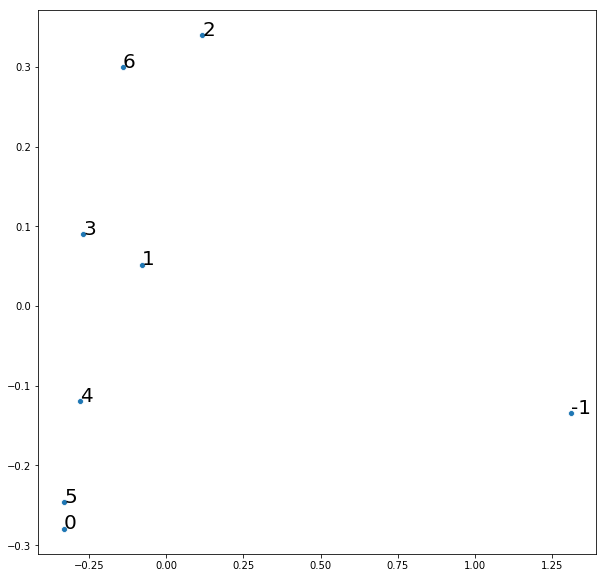

In [39]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x=vecs_list[:,0],y=vecs_list[:,1])
for i,(x_name,y_name) in enumerate(vecs_list):
    plt.annotate(df_cluster_labels_num_g.index[i],(x_name,y_name), fontsize=20)

In [40]:
gc.collect()

2393

In [41]:
#列を基準にカラーリング
df_cluster_labels_num_g.style.background_gradient(axis=0,cmap='Greens')

,age_mean,age_std,fare_mean,fare_std
labels,,,,
-1,0.0310271,1.13814,0.236847,1.15402
0,-0.404082,0.29054,-0.498216,0.0277681
1,-0.1147,0.647685,-0.500445,0.04922
2,0.192272,0.777839,-0.392336,0.0868324
3,-0.0171612,0.319606,-0.515653,0.0112462
4,-0.233628,0.324803,-0.514723,0.0447707
5,-0.371934,0.292357,-0.493914,0.0179822
6,0.23428,0.322214,-0.390578,0.0491779


x軸がfareの大きさ、Y軸がageの大きさと推測

In [42]:
df_cluster_labels_num_g_tmp.index[1]

0

In [43]:
def visualize_multiple_scatter_plot(df, nrow, ncol, xlabel_name, ylabel_name, xrotation=0, fig_width=30, fig_height=20):
    """
    複数列の散布図を描画する
    
    Parameters
    ----------
    df：dataframe
    　対象のデータフレーム
    nrow : int
        グラフの行数
    ncol : int
        グラフの列数
    xlabel_name : str
　　  グラフのX軸のラベル
    ylabel_name : str
　　  グラフのY軸のラベル
    xrotation : int
        Xラベルの角度
    fig_width：int
        1つのグラフの幅
    fig_height : int
        1つのグラフの高さ
    Returns
    -------
    　 複数列の散布図の表示
    """        
    plt.figure(figsize=(fig_width, fig_height))
    for i, col in enumerate(df.columns.tolist()):
        plt.subplot(nrow, ncol, i+1)
        plt.scatter(df.index, df[col])
        plt.title('Distribution Of ' + col)
        plt.xlabel(xlabel_name)
        plt.xticks(rotation=xrotation)
        # Y軸ラベルの指数表記を制御
        plt.ticklabel_format(style='plain', axis='y')
        plt.ylabel(ylabel_name)
        plt.tight_layout()

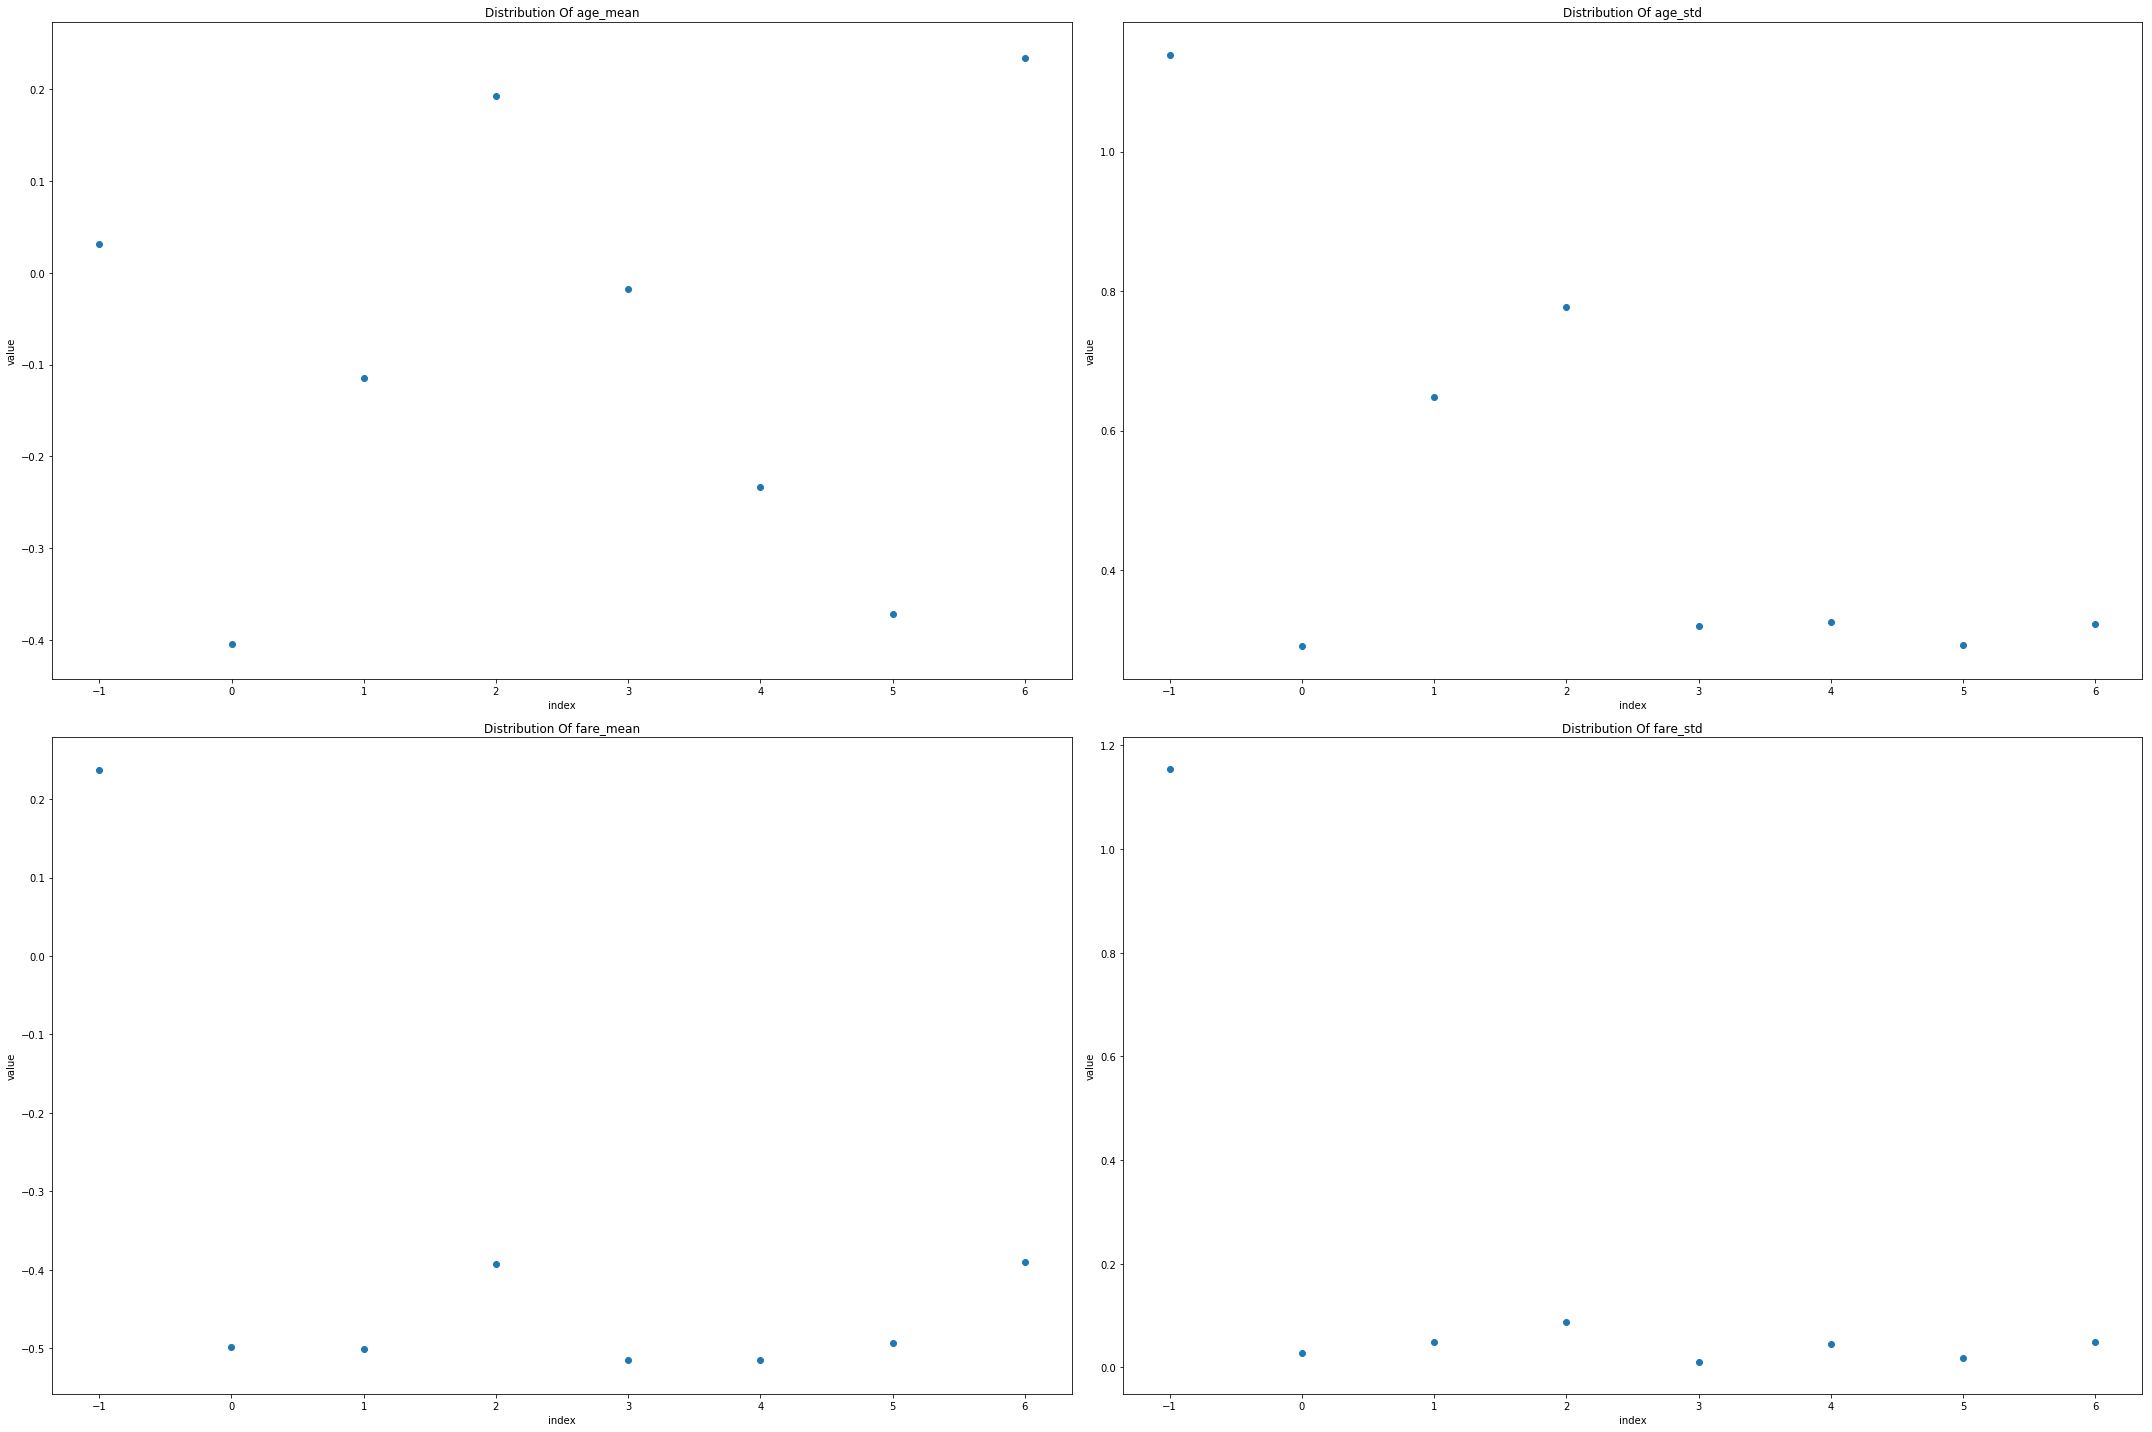

In [44]:
ncol = 2
nrow = int(round(len(df_cluster_labels_num_g.columns.tolist())/ ncol, 0))
visualize_multiple_scatter_plot(df_cluster_labels_num_g, nrow, ncol, 'index', 'value', xrotation=0)

In [50]:
def visualize_multiple_bar_plot(df, nrow, ncol, xlabel_name, ylabel_name, xrotation=0, fig_width=30, fig_height=20,barwidth=0.4):
    """
    複数列の棒グラフを描画する
    
    Parameters
    ----------
    df：dataframe
    　対象のデータフレーム
    nrow : int
        グラフの行数
    ncol : int
        グラフの列数
    xlabel_name : str
　　  グラフのX軸のラベル
    ylabel_name : str
　　  グラフのY軸のラベル
    xrotation : int
        Xラベルの角度
    fig_width：int
        1つのグラフの幅
    fig_height : int
        1つのグラフの高さ
    barwidth : int
        棒同士の間隔
    Returns
    -------
    　 複数列の棒グラフの表示
    """
    plt.figure(figsize=(fig_width, fig_height))
    for i, col in enumerate(df.columns.tolist()):
        plt.subplot(nrow, ncol, i+1)
        plt.bar(df.index, df[col], width=barwidth)
        plt.title('Barplot Of ' + col)
        plt.xlabel(xlabel_name)
        plt.xticks(rotation=xrotation)
        # Y軸ラベルの指数表記を制御
        plt.ticklabel_format(style='plain', axis='y')
        plt.ylabel(ylabel_name)
        plt.tight_layout()

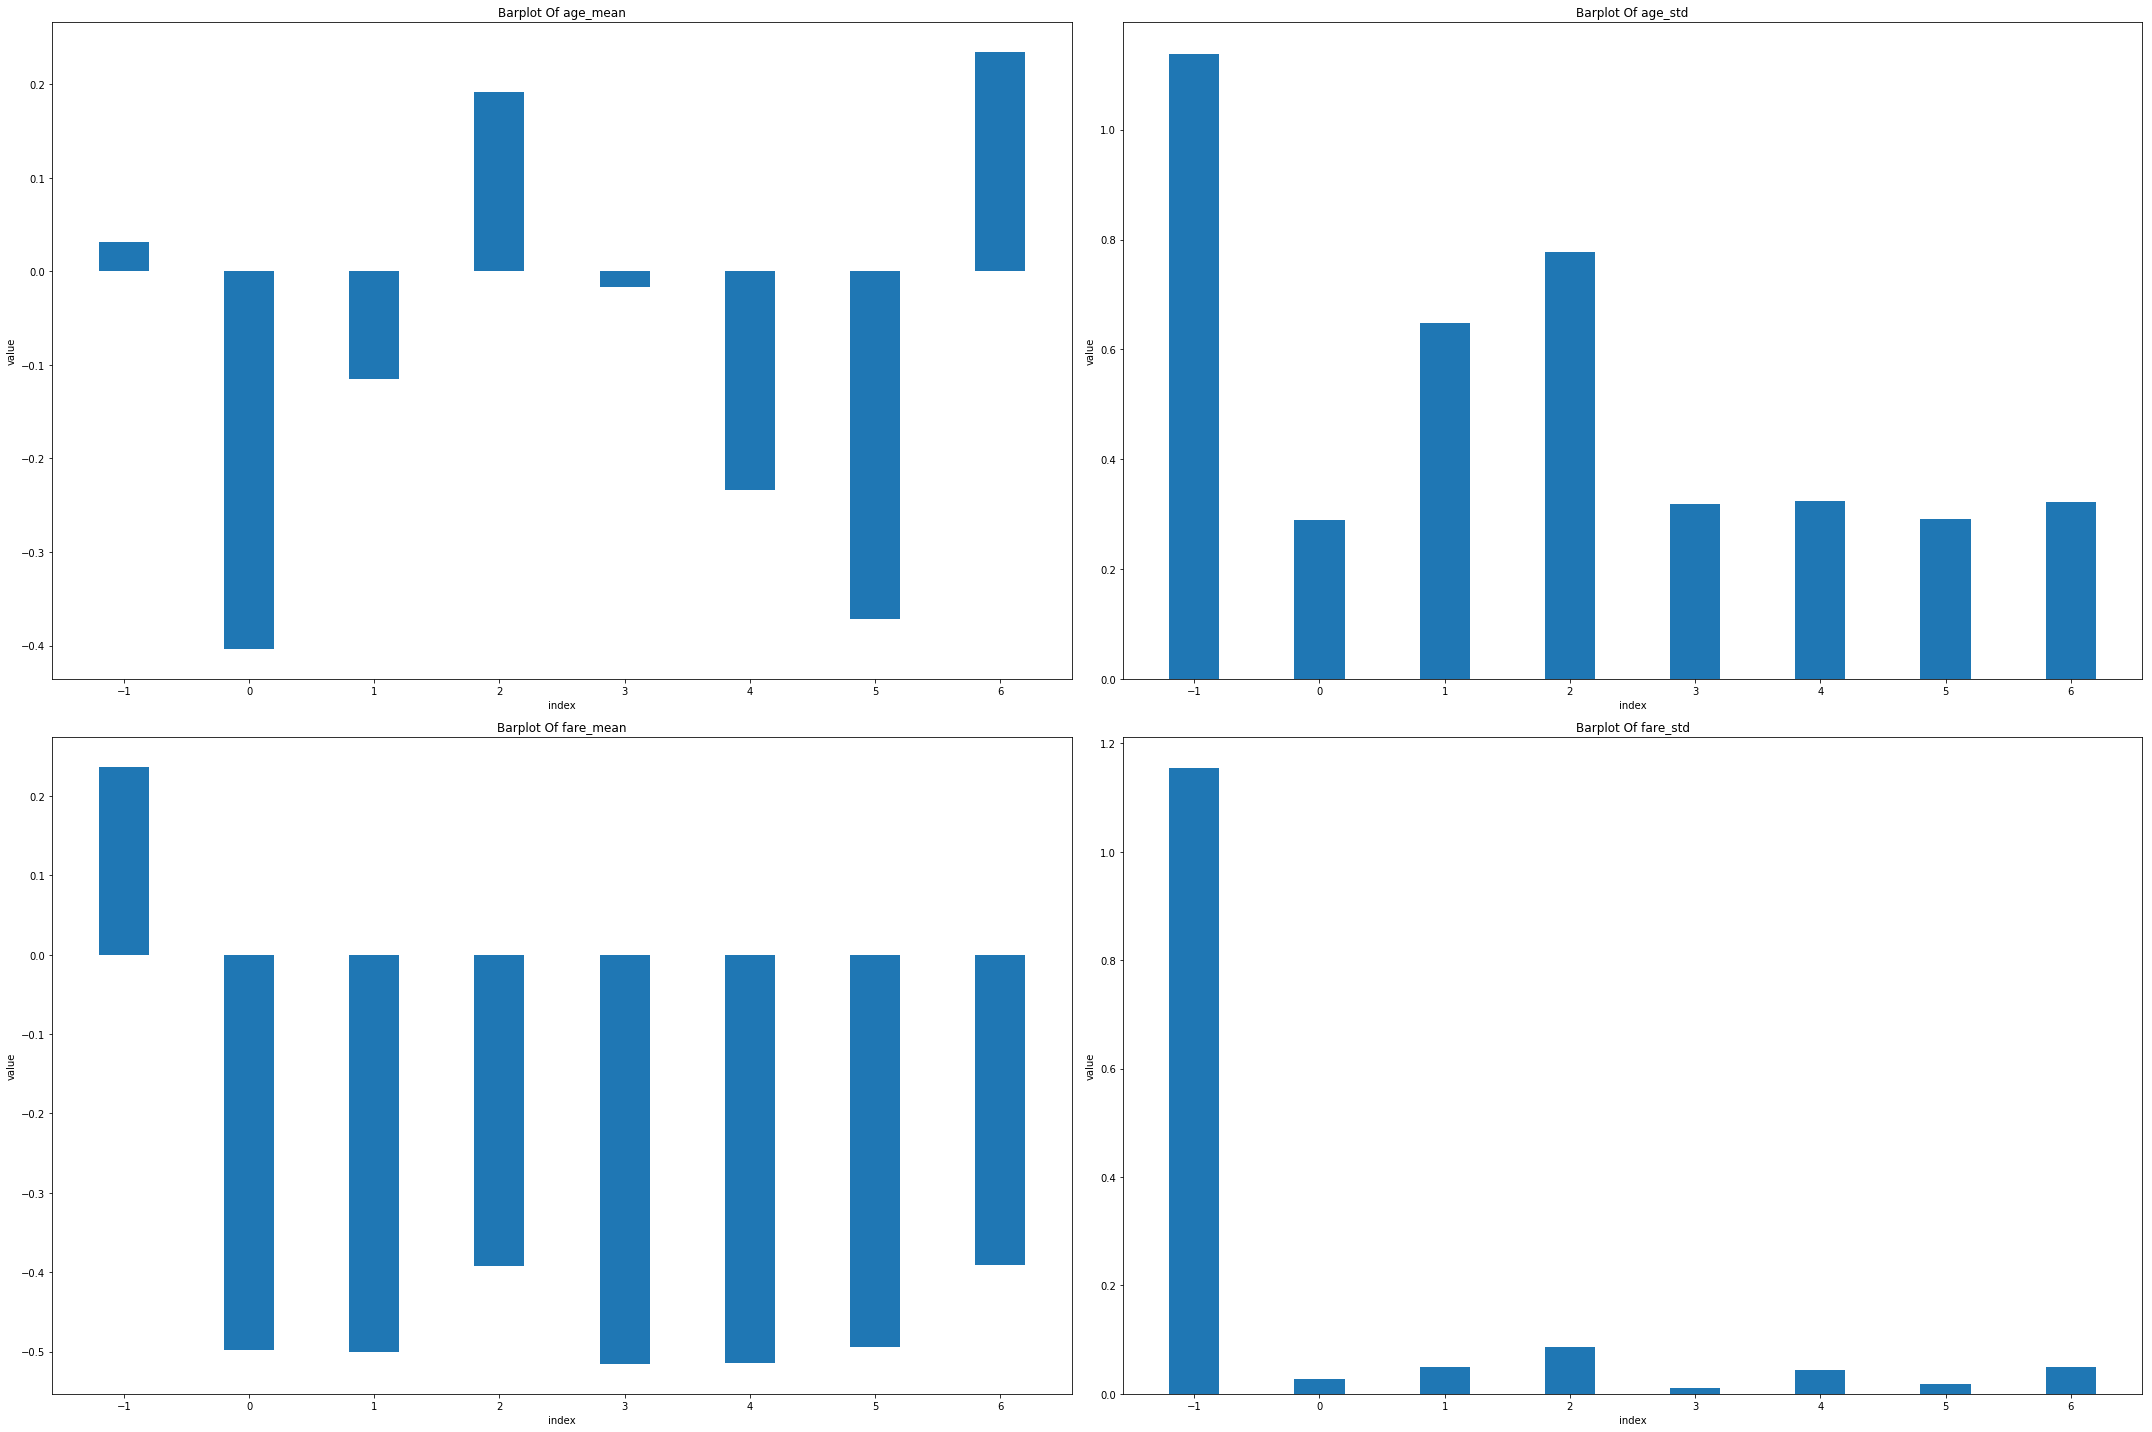

In [51]:
ncol = 2
nrow = int(round(len(df_cluster_labels_num_g.columns.tolist())/ ncol, 0))
visualize_multiple_bar_plot(df_cluster_labels_num_g, nrow, ncol, 'index', 'value', xrotation=0)

In [52]:
gc.collect()

11224

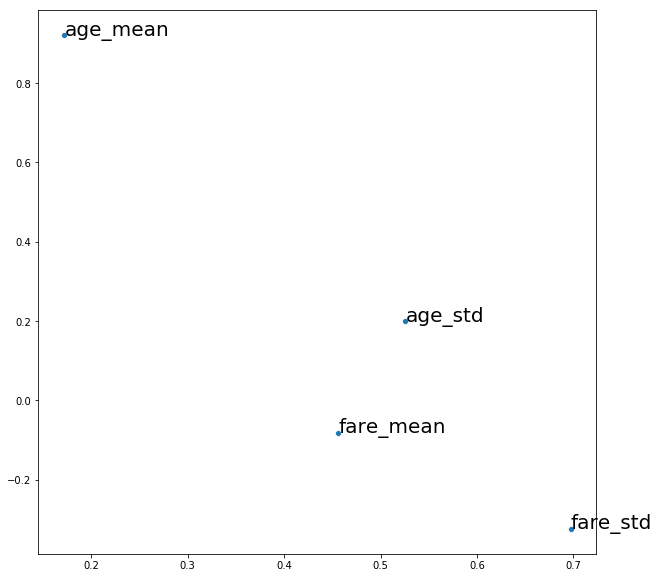

In [53]:
X_comp, Y_comp = model_pca.components_
plt.figure(figsize=(10, 10))
sns.scatterplot(x=X_comp,y=Y_comp)
for i,(x_name,y_name) in enumerate(zip(X_comp, Y_comp)):
    plt.annotate(df_cluster_labels_num_g.columns[i],(x_name,y_name), fontsize=20)

X軸はfareの標準偏差、Y軸はageの中央値と平均

In [54]:
#https://qiita.com/oki_kosuke/items/43cb63134f9a03ebc79a
df_score = pd.DataFrame(model_pca.transform(df_cluster_labels_num_g)
                        , index=df_cluster_labels_num_g.index)
df_score.style.background_gradient(axis=0,cmap='Greens')

,0,1
labels,,
-1,1.31,-0.134812
0,-0.330865,-0.279263
1,-0.0793217,0.0517641
2,0.117453,0.339412
3,-0.268472,0.0896997
4,-0.279191,-0.119587
5,-0.329238,-0.24647
6,-0.140368,0.299256


### ローディング（各主成分の構成方法）
ローディングとは各主成分がどのように構成されるかを表す値

In [55]:
#https://qiita.com/oki_kosuke/items/43cb63134f9a03ebc79a
df_loadings = pd.DataFrame(model_pca.components_.T
                           , index=df_cluster_labels_num_g.columns)
df_loadings.style.background_gradient(axis=0,cmap='Greens')

,0,1
age_mean,0.172063,0.921057
age_std,0.525872,0.199532
fare_mean,0.455935,-0.0820107
fare_std,0.697119,-0.324216


### スコア（各主成分に対するサンプルの値）
スコアとは各サンプルが各主成分軸上のどの座標に位置するかを表す値

### 寄与率

In [56]:
pd.DataFrame(model_pca.explained_variance_ratio_)

,0
0,0.805404
1,0.146644


In [57]:
gc.collect()

2253